In [192]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

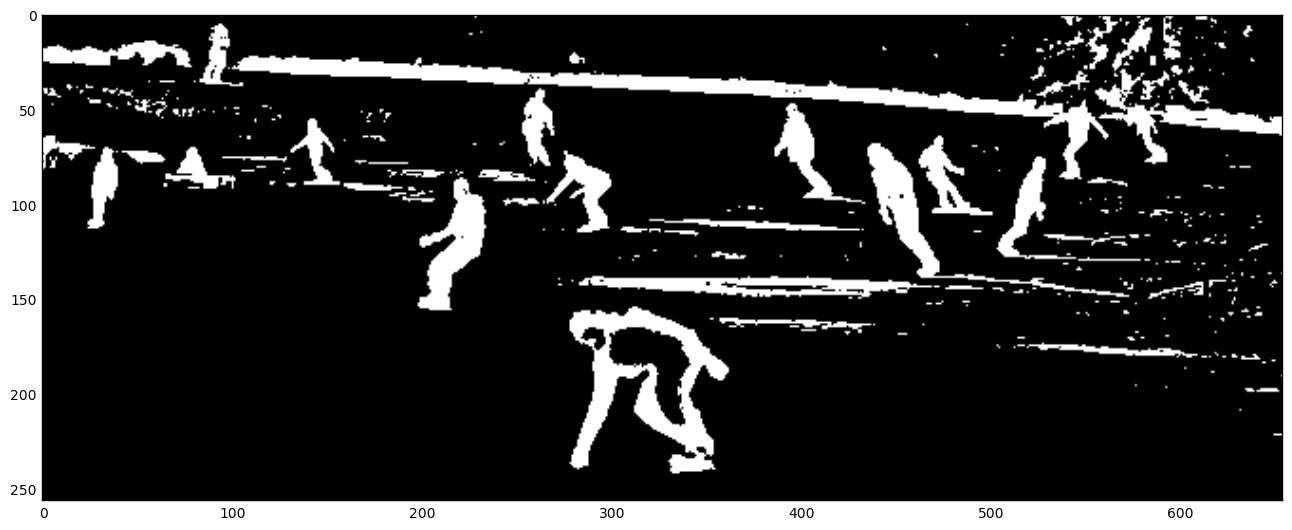

In [193]:
img_snow = cv2.cvtColor(cv2.imread('../../images/snowboarders.jpg'), cv2.COLOR_BGR2RGB)

img_snow_gs = cv2.cvtColor(img_snow, cv2.COLOR_RGB2GRAY) # konvert u grayscale)
#edges = cv2.Canny(img_snow_gs,20,300)
# plt.imshow(img_snow_gs, 'gray')
img_snow_bin = cv2.adaptiveThreshold(img_snow_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,23, 15)
# ret, img_snow_bin = cv2.threshold(img_snow_gs, 0, 255, cv2.THRESH_OTSU)
# ret, img_snow_bin = cv2.threshold(img_snow_gs, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_snow_bin, 'gray')
#img_snow_bin = edges

(83.0, 87.0)
(70.53672790527344, 31.210128784179688)
(37.71651840209961, 56.53801345825195)
(37.484954833984375, 35.18918991088867)
(19.16031265258789, 35.65273666381836)
(42.992095947265625, 12.869343757629395)
(48.274898529052734, 157.57421875)
(25.965930938720703, 49.63753128051758)
(21.10441780090332, 37.15030288696289)
(24.55577278137207, 64.95858764648438)
(16.0, 40.0)
(43.5142707824707, 99.3988265991211)
(31.52226448059082, 22.16529083251953)
Ukupan broj skijasa: 13


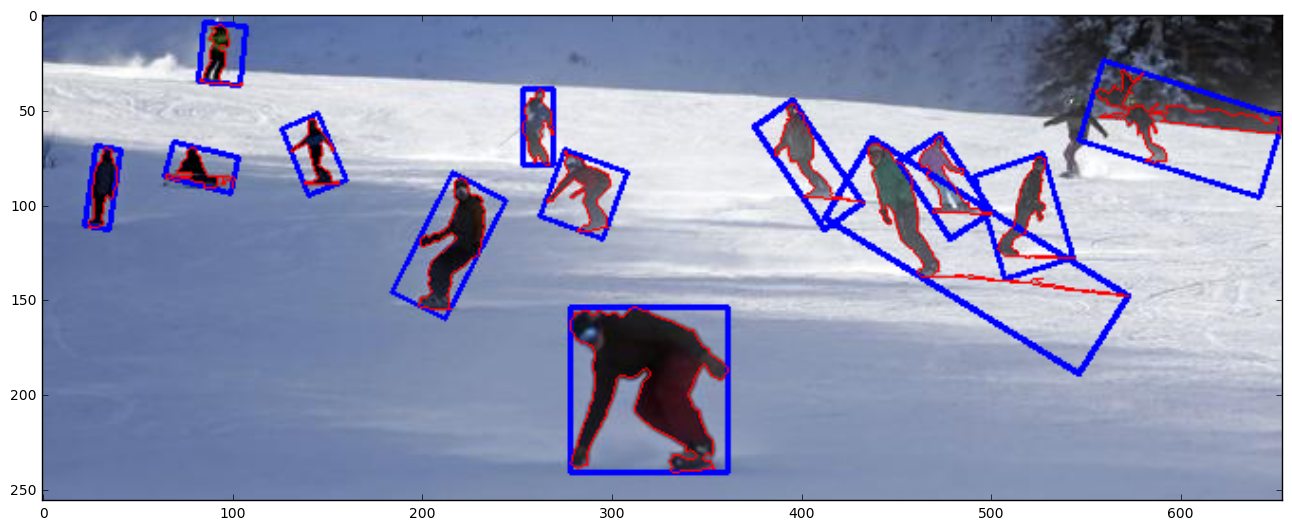

In [194]:
img, contours, hierarchy = cv2.findContours(img_snow_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_snow = [] 
for contour in contours: 
    center, size, angle = cv2.minAreaRect(contour) 
    height, width = size
    area = cv2.contourArea(contour)
    x, y = center;
    if width > 10 and height > 15 and area > 150:
        print size
        contours_snow.append(contour)
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img_snow,[box],0,(0,0,255),2)

img = img_snow.copy()
cv2.drawContours(img, contours_snow, -1, (255, 0, 0), 1)
plt.imshow(img)
print 'Ukupan broj skijasa: %d' % len(contours_snow)